# Decision Tree

In [4]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import push_results as pr

In [5]:
filepath = '../data/train_test_split/scherzer/2019_all_classes/'

infile = open(filepath + 'X_train_ac.pickle','rb')
X_train = pickle.load(infile)
infile.close()

infile = open(filepath + 'X_test_ac.pickle','rb')
X_test = pickle.load(infile)
infile.close()

infile = open(filepath + 'y_train_ac.pickle','rb')
y_train = pickle.load(infile)
infile.close()

infile = open(filepath + 'y_test_ac.pickle','rb')
y_test = pickle.load(infile)
infile.close()

In [6]:
y_train = np.array(y_train).reshape(-1, ).astype('int')
y_test = np.array(y_test).reshape(-1, ).astype('int')
# y_train_2c = np.array(y_train_2c).reshape(-1, )
# y_train_3c = np.array(y_train_3c).reshape(-1, )

## model for all types of pitches

In [7]:
model = DecisionTreeClassifier(random_state=31)

In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=31, splitter='best')

In [9]:
model.score(X_train, y_train)

1.0

In [10]:
model.score(X_test, y_test)

0.36341756919374246

In [11]:
y_pred = model.predict(X_train)

In [12]:
# pr.push_results('model_def_v2', 'GradientBoostingClassifier', 'Default', model.score(X_train, y_train))

# # results_dict.update({'Gradient Boosting': model.score(X_train, y_train)})

## Cross validation

In [13]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring= 'accuracy')

In [14]:
np.average(scores)

0.35689682729960837

In [15]:
# pr.push_results('model_cv_v2', 'GradientBoostingClassifier', 'Cross Validation', model.score(X_train, y_train))


# # results_dict.update({'GradientBoosting CV5': np.average(scores)})

## Randomized Search

In [16]:
# params = {'n_estimators': range(1, 500, 25), 
#           'max_depth': range(1, 20, 5), 
#           'max_features': ['auto', 'sqrt', 'log2'], 
#           'subsample': [.01, .05, .1, .5, .75, .9, 1], 
#           'criterion': ['friedman_mse', 'mse', 'mae'],
#           'learning_rate': [.01, 1, .01], 
#           'min_samples_split':range(20, 300, 20)
#          }

model2 = GradientBoostingClassifier(random_state=31)

params = {'min_samples_split': [5],
          'max_depth': [1],
          'max_features': ['sqrt'],
          'learning_rate': [.001],
          'n_estimators': [1], 'subsample': [.008], 
          'criterion': ['friedman_mse', 'mse', 'mae']}

rs = RandomizedSearchCV(model2, params, n_jobs=-1, random_state=31, cv=10, verbose = 1, n_iter=10000)

rs.fit(X_train, y_train);

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10000. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s finished


In [17]:
rs.best_params_, rs.score(X_train, y_train), rs.score(X_test, y_test)

({'subsample': 0.008,
  'n_estimators': 1,
  'min_samples_split': 5,
  'max_features': 'sqrt',
  'max_depth': 1,
  'learning_rate': 0.001,
  'criterion': 'friedman_mse'},
 0.48427024239298605,
 0.48375451263537905)

In [15]:
modelb = GradientBoostingClassifier(subsample=1, 
                                  n_estimators=776, 
                                  min_samples_split= 200,
                                  max_features='sqrt', 
                                  max_depth=4, 
                                  loss='deviance', 
                                  learning_rate = 0.001,
                                  criterion ='mse', 
                                  random_state=31)

In [16]:
modelb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=776,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=31, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
modelb.score(X_train, y_train)

0.48427024239298605

In [18]:
modelb.score(X_test, y_test)

0.48375451263537905

## Model validation
Code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [20]:
# Binarize the output
y_train = label_binarize(y_train, classes=[0, 1, 2, 3, 4])
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_train.shape[1]

In [21]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(modelb)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [22]:
# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=31))

# y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [23]:
classifier.score(X_train, y_train)

0.16967509025270758

In [24]:
classifier.score(X_test, y_test)

0.12394705174488568

In [25]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [26]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<Figure size 432x288 with 0 Axes>

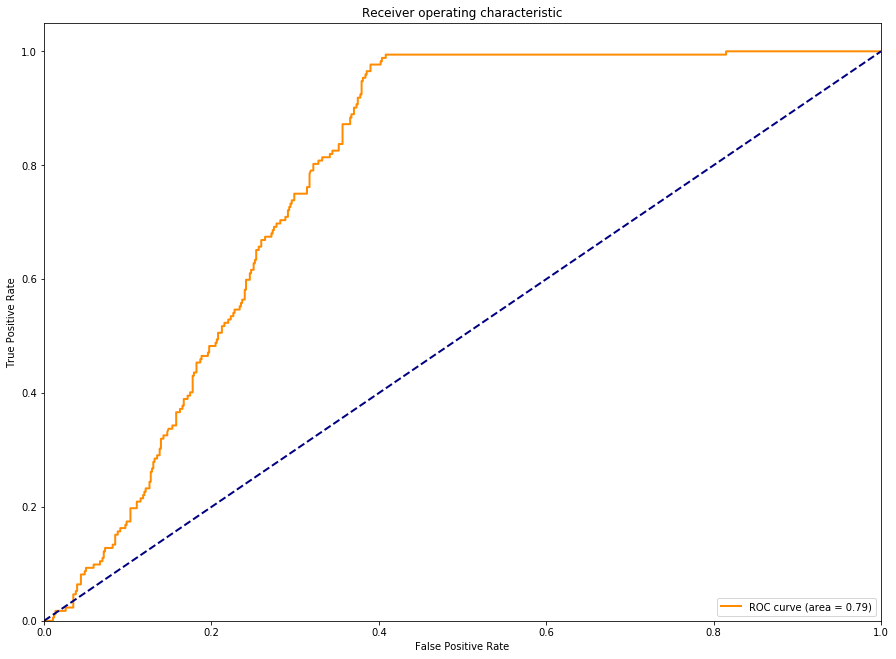

In [27]:
plt.figure()
plt.figure(figsize=(15,11))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Multiclass ROC

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


<Figure size 432x288 with 0 Axes>

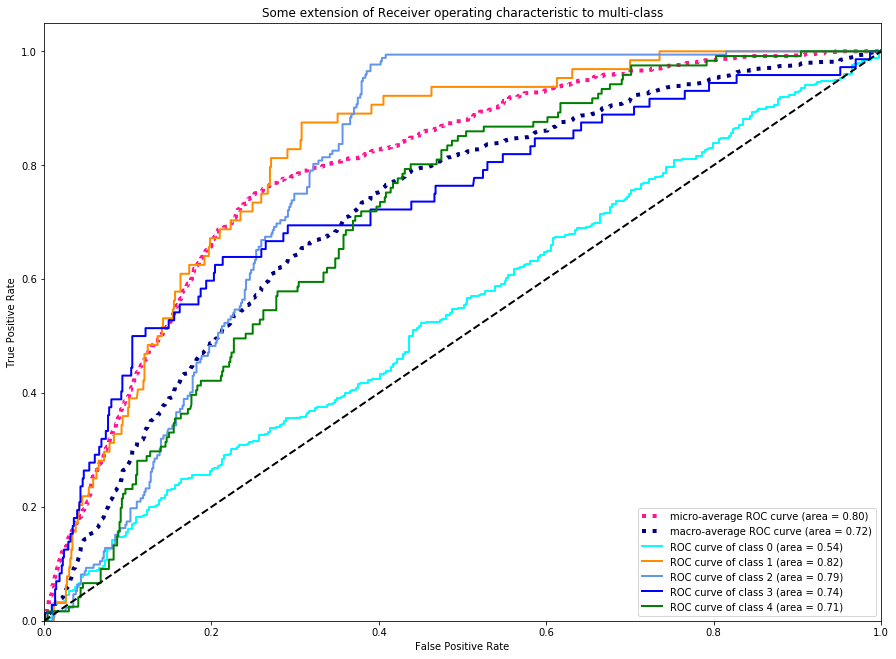

In [28]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.figure(figsize=(15,11))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.show()

In [29]:
from sklearn.neural_network import MLPClassifier

In [30]:
clf = MLPClassifier(random_state=31, max_iter=300, hidden_layer_sizes=(500,))
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)
# clf.predict_proba(X_test[:1])

# clf.predict(X_test[:5, :])



/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.7230531201650335, 0.28760529482551145)

In [31]:
params = {'hidden_layer_sizes': [(100,), (200,), (300,), (500,), (1000,)],
          'activation': ['identity', 'logistic', 'tanh', 'relu'],
          'solver': ['lbfgs', 'sgd', 'adam'],
          'alpha': [0.0001, .001, .01, 1],
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'learning_rate_init': [0.001, 0.01, .1, 1]}

In [32]:
rsmlp = RandomizedSearchCV(estimator = clf, param_distributions= params, n_iter = 5, n_jobs = -1, cv = 5, verbose = 1)

In [33]:
rsmlp.fit(X_train, y_train);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:   32.4s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   37.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(500,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=300,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                            

In [34]:
rsmlp.score(X_train, y_train)

0.2996389891696751

In [35]:
rsmlp.best_params_

{'solver': 'adam',
 'learning_rate_init': 0.1,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (500,),
 'alpha': 0.01,
 'activation': 'identity'}

In [36]:
rsmlp.score(X_test, y_test)

0.26714801444043323

In [37]:
rsmlp.classes_

array([0, 1, 2, 3, 4])

In [38]:
rsmlp.error_score

nan

In [39]:
rsmlp.predict_proba(X_test)

array([[0.40614938, 0.09708069, 0.01445942, 0.21544647, 0.2462691 ],
       [0.39550991, 0.13974764, 0.04120667, 0.14432993, 0.19612447],
       [0.60645421, 0.06376087, 0.0131002 , 0.20391015, 0.10057777],
       ...,
       [0.64310693, 0.00474784, 0.25507894, 0.01693802, 0.05880021],
       [0.57908466, 0.00563918, 0.22000268, 0.01990114, 0.07099692],
       [0.44132344, 0.01628571, 0.37501263, 0.00729554, 0.09706985]])

In [40]:
y_test

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])